# **PROYECTO IA - GJR trades Bot de trading**

INTEGRANTES



*   Juan Jeronimo Jauregui Prince
*   Gabriel Castillo Uribe
*   Ricardo Andrés Pérez Porras





Librería a utilizar

In [ ]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.2 MB/s eta 0:00:00


In [ ]:
# Librerias
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import argrelextrema
import mplfinance as mpf


Conexión al drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Carga de cvs
CARPETA_ARCHIVOS = "" #@param {type:"string"}
AAPL_H1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/AAPL.US_H1.csv"
AAPL_D1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/AAPL.US_D1.csv"
AAPL_W1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/AAPL.US_W1.csv"

# #AMZN
# AMZN_H1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/AMZN.US_H1.csv"
# AMZN_D1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/AMZN.US_D1.csv"
# AMZN_W1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/AMZN.US_W1.csv"

# #NVDA
# NVDA_H1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/NVDA.US_H1.csv"
# NVDA_D1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/NVDA.US_D1.csv"
# NVDA_W1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/NVDA.US_W1.csv"

# #AMD
# AMD_H1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/AMD.US_H1.csv"
# AMD_D1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/AMD.US_D1.csv"
# AMD_W1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/AMD.US_W1.csv"

# #MSFT
MSFT_H1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/MSFT.US_H1.csv"
MSFT_D1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/MSFT.US_D1.csv"
MSFT_W1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/MSFT.US_W1.csv"

# #META
# META_H1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/META.US_H1.csv"
# META_D1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/META.US_D1.csv"
# META_W1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/META.US_W1.csv"

# #INTC
# INTC_H1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/INTC.US_H1.csv"
# INTC_D1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/INTC.US_D1.csv"
# INTC_W1R = "/content/drive/MyDrive/"+CARPETA_ARCHIVOS+"/INTC.US_W1.csv"
# #Cargar del CSV en un DataFrame
AAPL_H1 = pd.read_csv(AAPL_H1R)
AAPL_D1 = pd.read_csv(AAPL_D1R)
AAPL_W1 = pd.read_csv(AAPL_W1R)
# AAPL_W1['datetime'] = pd.to_datetime(AAPL_W1['datetime'])
# AAPL_W1.set_index('datetime', inplace=True)
# # Pasamos a formato fecha la fecha
# AAPL_D1['datetime'] = pd.to_datetime(AAPL_D1['datetime'])
# AAPL_D1.set_index('datetime', inplace=True)
# # AMZN_H1 = pd.read_csv(AMZN_H1R)
# # AMZN_D1 = pd.read_csv(AMZN_D1R)
# AMZN_W1 = pd.read_csv(AMZN_W1R)
# AMZN_W1['datetime'] = pd.to_datetime(AMZN_W1['datetime'])
# AMZN_W1.set_index('datetime', inplace=True)
# #
# # NVDA_H1 = pd.read_csv(NVDA_H1R)
# # NVDA_D1 = pd.read_csv(NVDA_D1R)
# NVDA_W1 = pd.read_csv(NVDA_W1R)
# NVDA_W1['datetime'] = pd.to_datetime(NVDA_W1['datetime'])
# NVDA_W1.set_index('datetime', inplace=True)
# # AMD_H1 = pd.read_csv(AMD_H1R)
# # AMD_D1 = pd.read_csv(AMD_D1R)
# AMD_W1 = pd.read_csv(AMD_W1R)
# AMD_W1['datetime'] = pd.to_datetime(AMD_W1['datetime'])
# AMD_W1.set_index('datetime', inplace=True)
# #
# # MSFT_H1 = pd.read_csv(MSFT_H1R)
# # MSFT_D1 = pd.read_csv(MSFT_D1R)
# MSFT_W1 = pd.read_csv(MSFT_W1R)
# MSFT_W1['datetime'] = pd.to_datetime(MSFT_W1['datetime'])
# MSFT_W1.set_index('datetime', inplace=True)
# #
# # META_H1 = pd.read_csv(META_H1R)
# # META_D1 = pd.read_csv(META_D1R)
# META_W1 = pd.read_csv(META_W1R)
# META_W1['datetime'] = pd.to_datetime(META_W1['datetime'])
# META_W1.set_index('datetime', inplace=True)
# #
# # INTC_H1 = pd.read_csv(INTC_H1R)
# # INTC_D1 = pd.read_csv(INTC_D1R)
# INTC_W1 = pd.read_csv(INTC_W1R)
# INTC_W1['datetime'] = pd.to_datetime(INTC_W1['datetime'])
# INTC_W1.set_index('datetime', inplace=True)

# # Mostrar las primeras filas
# print(AAPL_W1.head())


In [ ]:
AAPL_D1.head()

,datetime,open,high,low,close,volume
0,1998-01-02,0.12,0.14,0.12,0.14,170539824
1,1998-01-05,0.14,0.14,0.13,0.14,152723900
2,1998-01-06,0.14,0.17,0.13,0.16,433041952
3,1998-01-07,0.16,0.16,0.15,0.15,251914152
4,1998-01-08,0.15,0.16,0.15,0.16,188994988


**APPL_D1**

In [ ]:
# 50 day moving average
precio_col = "close"
# Calcular la media móvil de 50 días
AAPL_D1["SMA_50"] = AAPL_D1[precio_col].rolling(window=50).mean()
# Calcular la media móvil de 200 días
AAPL_D1["SMA_200"] = AAPL_D1[precio_col].rolling(window=200).mean()
# Mostrar las últimas filas para ver el resultado
print(AAPL_D1[[precio_col, "SMA_50", "SMA_200"]].tail())

       close    SMA_50    SMA_200
6634  170.98  184.8420  184.69610
6635  170.79  184.5566  184.62575
6636  172.75  184.2868  184.56430
6637  173.21  184.0392  184.51070
6638  171.12  183.7458  184.43145


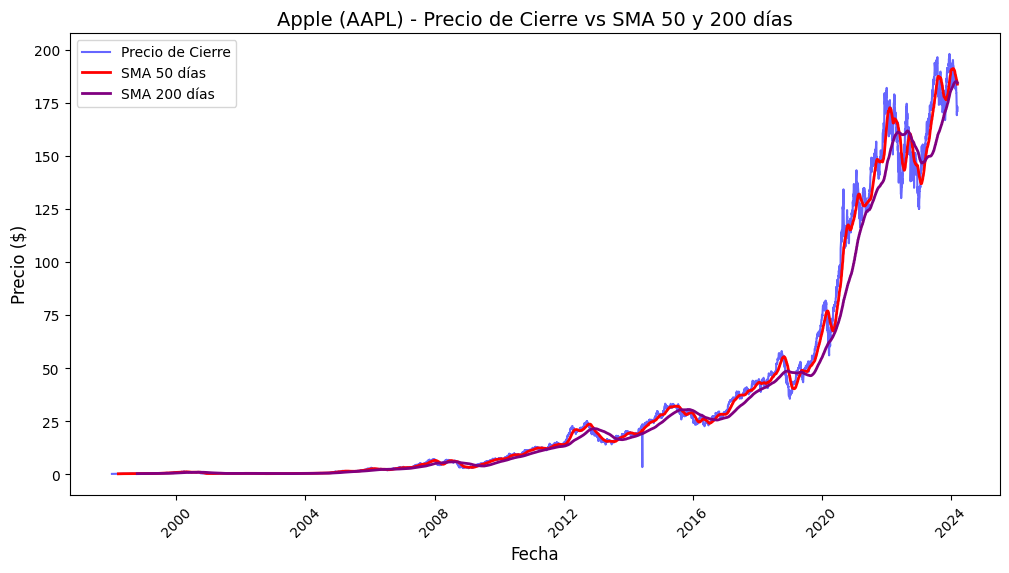

In [ ]:
plt.figure(figsize=(12, 6))

# Gráfica de cierres
plt.plot(AAPL_D1["close"], label="Precio de Cierre", color="blue", alpha=0.6, linewidth=1.5)
# Gráfica de medias móviles
plt.plot(AAPL_D1["SMA_50"], label="SMA 50 días", color="red", linewidth=2)
plt.plot(AAPL_D1["SMA_200"], label="SMA 200 días", color="purple", linewidth=2)

# Adornos
plt.title("Apple (AAPL) - Precio de Cierre vs SMA 50 y 200 días", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio ($)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()

In [ ]:
# Moda y mediana ##GABRIEL MODIFICA ESTO PARA TENER MODAS VARIABLES ETC
moda = stats.mode(AAPL_D1["close"])
mediana = np.median(AAPL_D1["close"])
print(f"Moda del precio de cierre: {moda[0]}")
print(f"Mediana del precio de cierre: {mediana}")

Moda del precio de cierre: 0.25
Mediana del precio de cierre: 12.07


In [ ]:
# Desviación estándar en ventana de 20 días
AAPL_W1["Desviación"] = AAPL_W1["close"].rolling(window=20).std()
AAPL_W1['Desviación'].tail()

,Desviación
datetime,
2024-02-11,8.098333
2024-02-18,7.894233
2024-02-25,7.752593
2024-03-03,7.955558
2024-03-10,7.486060


Text(0.5, 1.0, 'Precio con Media Móvil y Desviación Estándar (Bandas)')

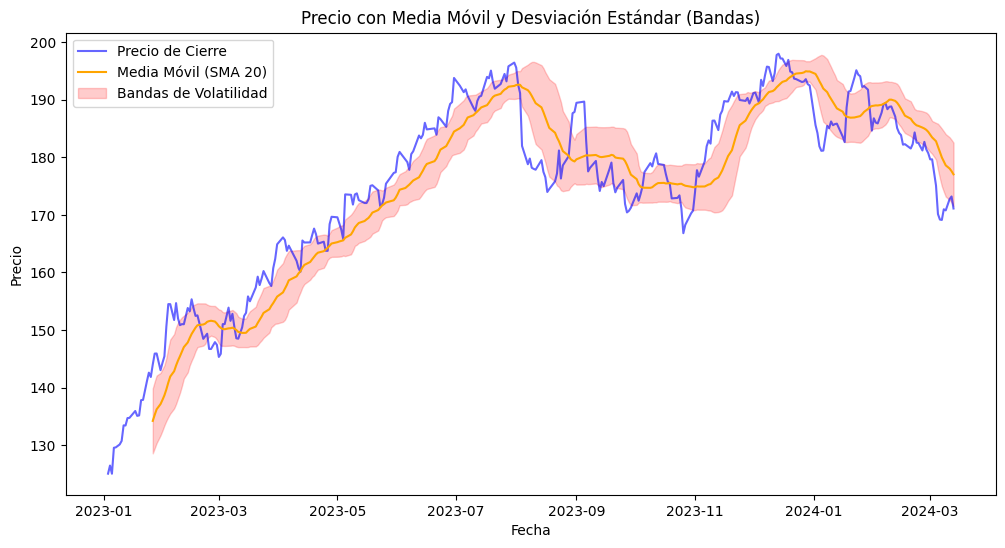

In [ ]:
# Filtrar datos desde 2023 hasta la última fecha disponible
df_filtrado = AAPL_D1.loc["2023":].copy()

# Calculo SMA de 20 días y la Desviación estándar
df_filtrado['SMA_20'] = df_filtrado['close'].rolling(window=20).mean()
df_filtrado['STD_20'] = df_filtrado['close'].rolling(window=20).std()

# Calculo bandas (Media ± STD)
df_filtrado['Upper_Band'] = df_filtrado['SMA_20'] + df_filtrado['STD_20']
df_filtrado['Lower_Band'] = df_filtrado['SMA_20'] - df_filtrado['STD_20']

plt.figure(figsize=(12,6))
plt.plot(df_filtrado.index, df_filtrado['close'], label='Precio de Cierre', color='blue', alpha=0.6)
plt.plot(df_filtrado.index, df_filtrado['SMA_20'], label='Media Móvil (SMA 20)', color='orange')
plt.fill_between(df_filtrado.index, df_filtrado['Upper_Band'], df_filtrado['Lower_Band'], color='red', alpha=0.2, label="Bandas de Volatilidad")

plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.title("Precio con Media Móvil y Desviación Estándar (Bandas)")

Correlación entre empresas

In [ ]:
dfs = {}
# Guardar solo la columna 'close' con el nombre de la empresa
dfs["APPL"] = AAPL_W1['close']
dfs["AMZN"] = AMZN_W1['close']
dfs["NVDA"] = NVDA_W1['close']
dfs["AMD"] = AMD_W1['close']
dfs["MSFT"] = MSFT_W1['close']
# Unir todas las empresas en un solo DataFrame por índice (datetime)
df_semanal = pd.DataFrame(dfs)

<Axes: >

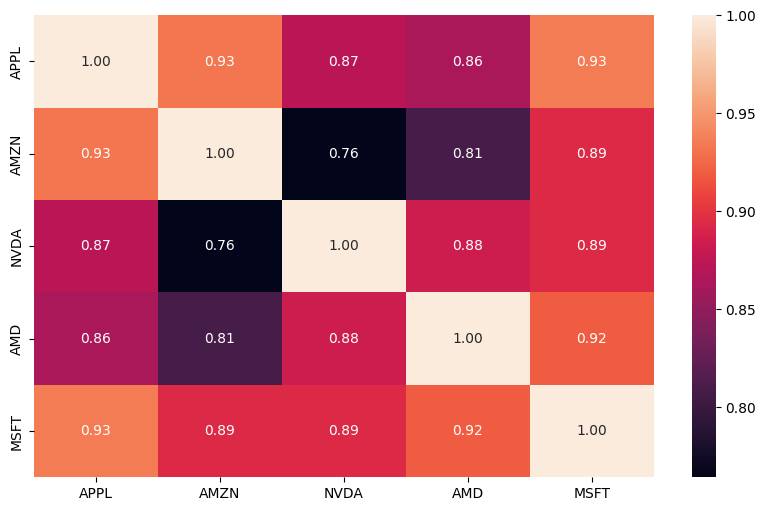

In [ ]:
plt.subplots(figsize=(10,6))
corr = df_semanal.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

In [ ]:
#intervalo, para fibonacci

# Filtrar un rango de fechas específico
inicio = "2023-05-23"
fin = "2023-06-05"

intervalo = AAPL_D1[(AAPL_D1.index >= inicio) & (AAPL_D1.index <= fin)]
print(intervalo)

              open    high     low   close    volume    SMA_50    SMA_200
datetime                                                                 
2023-05-23  173.13  173.38  171.28  171.56  37490406  165.4522  150.10140
2023-05-24  171.09  172.42  170.52  171.84  33808833  165.8400  150.17450
2023-05-25  172.41  173.90  171.69  172.99  42503224  166.2400  150.24965
2023-05-26  173.32  175.77  173.11  175.43  43884619  166.6316  150.34775
2023-05-30  176.96  178.99  176.57  177.30  42592518  167.0776  150.46160
2023-05-31  177.33  179.35  176.76  177.42  49593366  167.4780  150.56890
2023-06-01  177.70  180.12  176.93  180.09  53477555  167.8942  150.69710
2023-06-02  181.03  181.78  179.26  180.95  49123313  168.3568  150.81500
2023-06-05  182.63  184.95  178.04  179.61  96644730  168.7704  150.89590


In [ ]:
#fibonmacci

def calcular_fibonacci(intervalo, column1="low",column2 = "high"):
  max_price = intervalo[column2].max()
  min_price = intervalo[column1].min()
  range = max_price - min_price
       # Calcular niveles de Fibonacci
  levels = {
        "0%": max_price,
        "23.6%": max_price - range * 0.236,
        "38.2%": max_price - range * 0.382,
        "50%": max_price - range * 0.5,
        "61.8%": max_price - range * 0.618,
        "78.6%": max_price - range * 0.786,
        "100%": min_price,
    }
  return levels

niveles_fib = calcular_fibonacci(intervalo)
for nivel_f , precio in niveles_fib.items():
  print(f"Nivel {nivel_f}: {precio: .2f}")


Nivel 0%:  184.95
Nivel 23.6%:  181.54
Nivel 38.2%:  179.44
Nivel 50%:  177.74
Nivel 61.8%:  176.03
Nivel 78.6%:  173.61
Nivel 100%:  170.52


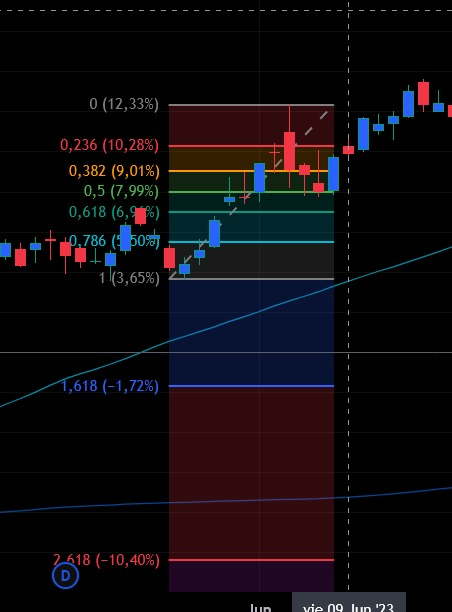

gabriel


<ipython-input-17-688b6213b772>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = AAPL_W1.resample('M').agg({'open': 'first',


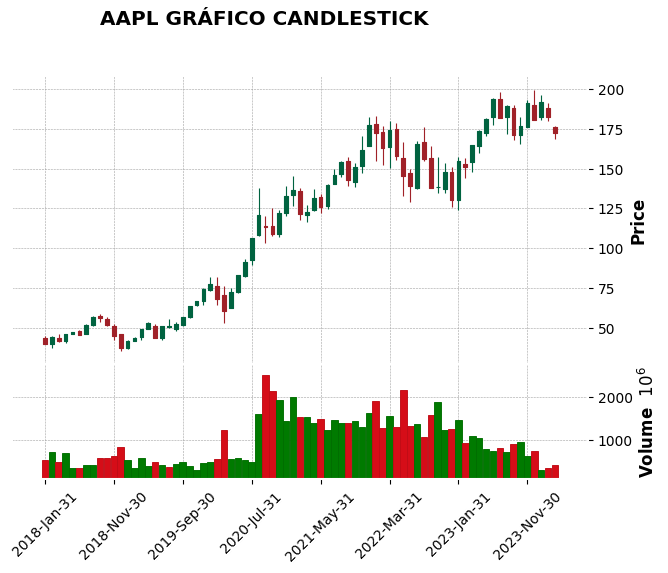

In [ ]:




AAPL_W1 = pd.read_csv(AAPL_W1R, parse_dates=['datetime'], index_col='datetime')
# Convertir el índice a tipo datetime por si acaso
AAPL_W1.index = pd.to_datetime(AAPL_W1.index)


AAPL_W1 = AAPL_W1[AAPL_W1.index >= '2018-01-01']


df_monthly = AAPL_W1.resample('M').agg({'open': 'first',
                                         'high': 'max',
                                         'low': 'min',
                                         'close': 'last',
                                         'volume': 'sum'})

mpf.plot(df_monthly, type='candle', style='charles', title='AAPL GRÁFICO CANDLESTICK ', volume=True)

<ipython-input-18-dca5f038b9e2>:10: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_quarterly = AAPL_W1.resample('Q').agg({'open': 'first',
<ipython-input-18-dca5f038b9e2>:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(quarterly_data, labels=labels, patch_artist=True, boxprops=dict(facecolor="lightblue"))


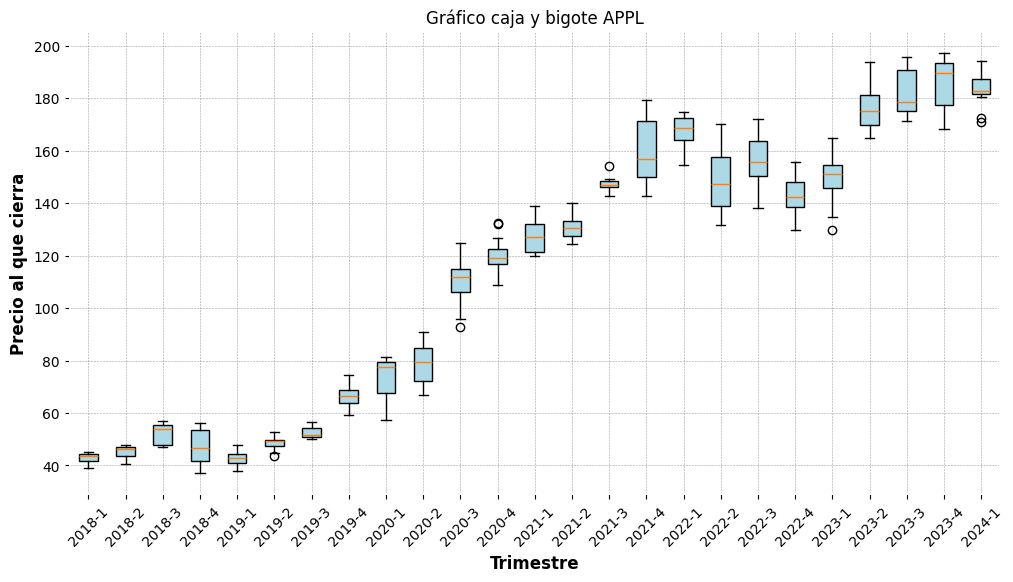

In [ ]:
AAPL_W1 = pd.read_csv(AAPL_W1R, parse_dates=['datetime'], index_col='datetime')

# datetime por si acaso
AAPL_W1.index = pd.to_datetime(AAPL_W1.index)

#2018 en adelante hp
AAPL_W1 = AAPL_W1[AAPL_W1.index >= '2018-01-01']

#
df_quarterly = AAPL_W1.resample('Q').agg({'open': 'first',
                                           'high': 'max',
                                           'low': 'min',
                                           'close': 'last',
                                           'volume': 'sum'})


quarterly_data = []
labels = []

for quarter in df_quarterly.index:
    quarterly_prices = AAPL_W1.loc[(AAPL_W1.index >= quarter - pd.DateOffset(months=3)) & (AAPL_W1.index < quarter), 'close']
    if not quarterly_prices.empty:
        quarterly_data.append(quarterly_prices.values)
        labels.append(f"{quarter.year}-{(quarter.quarter)}")



plt.figure(figsize=(12, 6))
plt.boxplot(quarterly_data, labels=labels, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.xticks(rotation=45)
plt.xlabel('Trimestre')
plt.ylabel('Precio al que cierra')
plt.title('Gráfico caja y bigote APPL')
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

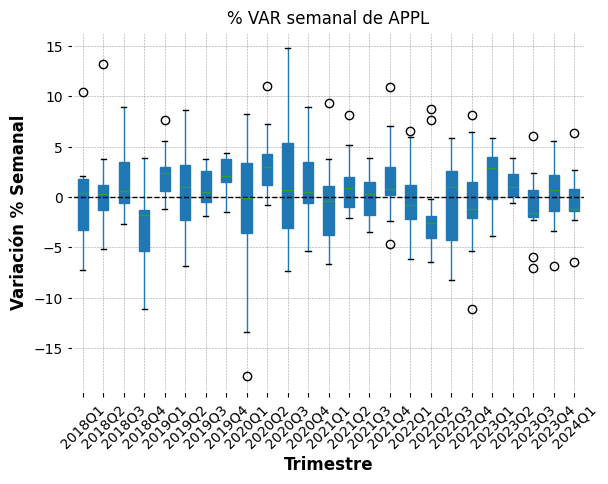

In [ ]:
#cajas y bigotez con variación

AAPL_W1 = pd.read_csv(AAPL_W1R, parse_dates=['datetime'], index_col='datetime')


AAPL_W1.index = pd.to_datetime(AAPL_W1.index)

AAPL_W1 = AAPL_W1[AAPL_W1.index >= '2018-01-01']


AAPL_W1['var_pct'] = AAPL_W1['close'].pct_change() * 100

AAPL_W1['trimestre'] = AAPL_W1.index.to_period('Q').astype(str)


plt.figure(figsize=(12, 6))
AAPL_W1.boxplot(column='var_pct', by='trimestre', patch_artist=True, grid=True)

plt.xticks(rotation=45)
plt.xlabel('Trimestre')
plt.ylabel('Variación % Semanal')
plt.title('% VAR semanal de APPL')
plt.suptitle('')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

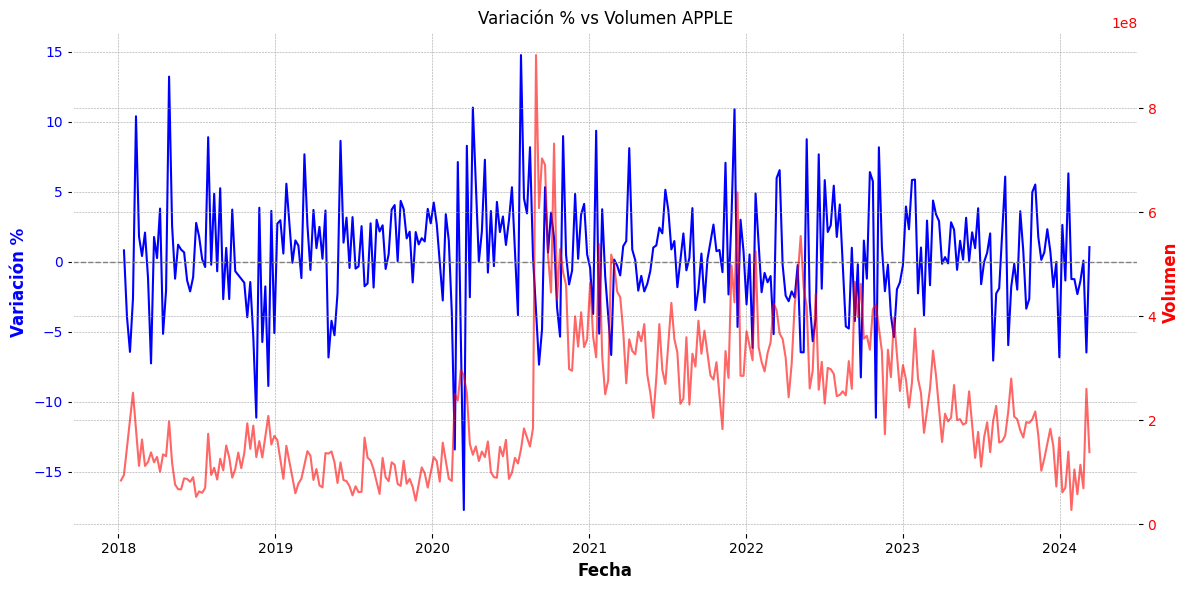

In [ ]:
#varaiacion semanal con lineas

import pandas as pd
import matplotlib.pyplot as plt


AAPL_W1 = pd.read_csv(AAPL_W1R, parse_dates=['datetime'], index_col='datetime')


AAPL_W1.index = pd.to_datetime(AAPL_W1.index)


AAPL_W1 = AAPL_W1[AAPL_W1.index >= '2018-01-01']


AAPL_W1['var_pct'] = AAPL_W1['close'].pct_change() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(AAPL_W1.index, AAPL_W1['var_pct'], color='blue', label='Variación %', linewidth=1.5)
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Variación %', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.axhline(0, color='gray', linestyle='--', linewidth=1)


ax2 = ax1.twinx()
ax2.plot(AAPL_W1.index, AAPL_W1['volume'], color='red', label='Volumen Transado', alpha=0.6, linewidth=1.5)
ax2.set_ylabel('Volumen', color='red')
ax2.tick_params(axis='y', labelcolor='red')


plt.title('Variación % vs Volumen APPLE')
fig.tight_layout()
plt.show()

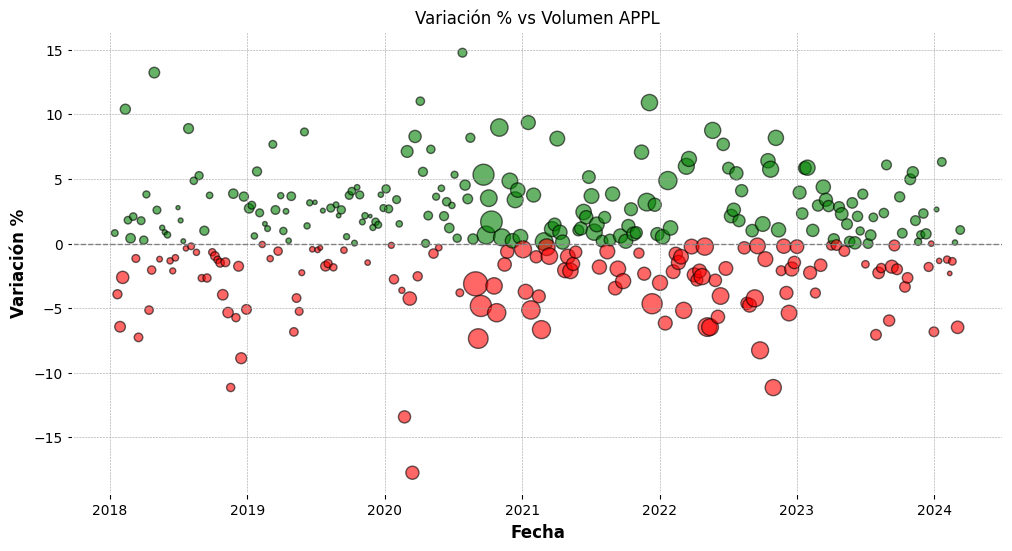

In [ ]:
#variacion vs volumen scatter plot

AAPL_W1 = pd.read_csv(AAPL_W1R, parse_dates=['datetime'], index_col='datetime')
AAPL_W1.index = pd.to_datetime(AAPL_W1.index)
AAPL_W1 = AAPL_W1[AAPL_W1.index >= '2018-01-01']
AAPL_W1['var_pct'] = AAPL_W1['close'].pct_change() * 100
colors = np.where(AAPL_W1['var_pct'] >= 0, 'green', 'red')
bubble_size = (AAPL_W1['volume'] - AAPL_W1['volume'].min()) / (AAPL_W1['volume'].max() - AAPL_W1['volume'].min()) * 300
plt.figure(figsize=(12, 6))
plt.scatter(AAPL_W1.index, AAPL_W1['var_pct'], s=bubble_size, c=colors, alpha=0.6, edgecolors='black')

plt.axhline(0, color='gray', linestyle='--', linewidth=1)  #EL 09
plt.xlabel('Fecha')
plt.ylabel('Variación %')
plt.title('Variación % vs Volumen APPL')
plt.grid(True)


plt.show()

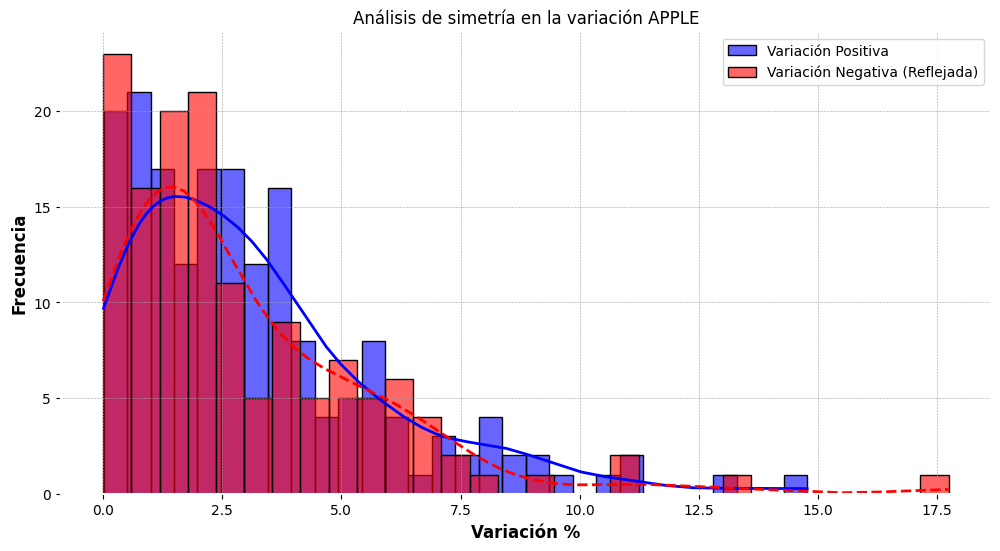

In [ ]:
#analisis de simetria

AAPL_W1 = pd.read_csv(AAPL_W1R, parse_dates=['datetime'], index_col='datetime')

AAPL_W1.index = pd.to_datetime(AAPL_W1.index)


AAPL_W1 = AAPL_W1[AAPL_W1.index >= '2018-01-01']


AAPL_W1['var_pct'] = AAPL_W1['close'].pct_change() * 100


AAPL_W1.dropna(inplace=True)


var_pos = AAPL_W1['var_pct'][AAPL_W1['var_pct'] > 0]
var_neg = -AAPL_W1['var_pct'][AAPL_W1['var_pct'] < 0]

plt.figure(figsize=(12, 6))

sns.histplot(var_pos, bins=30, kde=True, color='blue', alpha=0.6, label='Variación Positiva')
sns.histplot(var_neg, bins=30, kde=True, color='red', alpha=0.6, label='Variación Negativa (Reflejada)', line_kws={'linestyle': '--'})

# este es ek CERO
plt.axhline(0, color='black', linestyle='--', linewidth=1)


plt.xlabel('Variación %')
plt.ylabel('Frecuencia')
plt.title('Análisis de simetría en la variación APPLE')
plt.legend()
plt.grid(True)


plt.show()

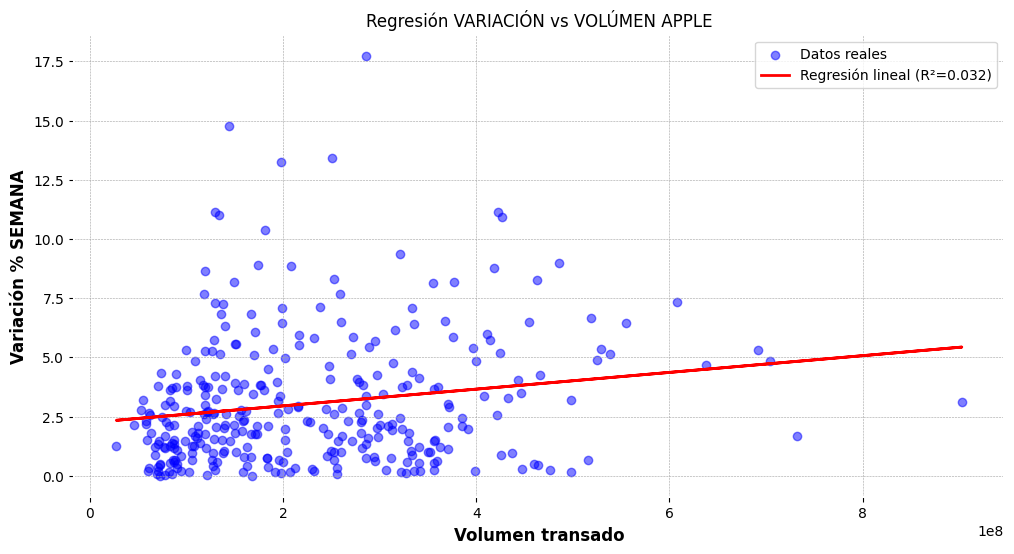

In [ ]:
from scipy.stats import linregress


AAPL_W1 = pd.read_csv(AAPL_W1R, parse_dates=['datetime'], index_col='datetime')

AAPL_W1.index = pd.to_datetime(AAPL_W1.index)

AAPL_W1 = AAPL_W1[AAPL_W1.index >= '2018-01-01']


AAPL_W1['var_pct'] = AAPL_W1['close'].pct_change().abs() * 100

AAPL_W1.dropna(inplace=True)

X = AAPL_W1['volume']
Y = AAPL_W1['var_pct']

slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = slope * X + intercept
plt.figure(figsize=(12, 6))
plt.scatter(X, Y, alpha=0.5, label="Datos reales", color="blue")
plt.plot(X, regression_line, color="red", linewidth=2, label=f'Regresión lineal (R²={r_value**2:.3f})')
plt.xlabel('Volumen transado')
plt.ylabel('Variación % SEMANA')
plt.title('Regresión VARIACIÓN vs VOLÚMEN APPLE')
plt.legend()
plt.grid(True)
plt.show()


# **RandomForest - Detector de tomas de liquidez**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# 1. Cargar y ordenar datos
AAPL_W1 = pd.read_csv(AAPL_W1R, parse_dates=['datetime'], index_col='datetime')
df = AAPL_W1.copy()

df = df.sort_values("datetime").reset_index()  # Mantiene datetime como columna

# 2. Calcular mínimos y máximos anteriores
lookback = 5
df["prev_low"] = df["low"].shift(1).rolling(window=lookback).min()
df["prev_high"] = df["high"].shift(1).rolling(window=lookback).max()

# 3. Detectar rupturas
df["broke_prev_low"] = df["low"] < df["prev_low"]
df["broke_prev_high"] = df["high"] > df["prev_high"]

# 4. Detectar reversión
reversal_strength = 0.005  # 0.5%
df["reversed_up"] = df["close"] > df["open"] * (1 + reversal_strength)
df["reversed_down"] = df["close"] < df["open"] * (1 - reversal_strength)

# 5. Detectar volumen alto
df["vol_threshold"] = df["volume"].rolling(window=20).quantile(0.8)
df["high_volume"] = df["volume"] > df["vol_threshold"]

# 6. Etiquetas
df["liquidity_grab_low"] = (df["broke_prev_low"] & df["reversed_up"] & df["high_volume"]).astype(int)
df["liquidity_grab_high"] = (df["broke_prev_high"] & df["reversed_down"] & df["high_volume"]).astype(int)
df["liquidity_grab"] = (df["liquidity_grab_low"] | df["liquidity_grab_high"]).astype(int)

#  7. Features
df["range"] = df["high"] - df["low"]
df["upper_wick"] = df["high"] - df[["open", "close"]].max(axis=1)
df["lower_wick"] = df[["open", "close"]].min(axis=1) - df["low"]
df["max_wick"] = df[["upper_wick", "lower_wick"]].max(axis=1)

#  8. Filtrar NaNs
df = df.dropna()

#  9. Crear X, y
features = ["open", "high", "low", "close", "volume", "range", "max_wick"]
X = df[features]
y = df["liquidity_grab"]

# 10. Split temporal
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# 11. Entrenamiento
clf = RandomForestClassifier(n_estimators=50, class_weight='balanced')
clf.fit(X_train, y_train)

#  12. Evaluación clásica
y_pred = clf.predict(X_test)
print("Evaluación con umbral estándar (0.5):\n")
print(classification_report(y_test, y_pred))

# 13. Evaluación con umbral ajustado
threshold = 0.1
probs = clf.predict_proba(X_test)[:, 1]
y_pred_threshold = (probs >= threshold).astype(int)

print(f"\nEvaluación con umbral ajustado ({threshold}):\n")
print(classification_report(y_test, y_pred_threshold))


#  14. Ver detecciones
df_test = df.iloc[split_index:].copy()
df_test["predicted"] = y_pred_threshold

detected_grabs = df_test[df_test["predicted"] == 1]

print("\nPrimeras 40 detecciones con el umbral ajustado:")
print(detected_grabs[["datetime", "open", "high", "low", "close", "volume", "range", "max_wick"]].head(40))
print(f"\nNúmero de tomas de liquidez detectadas (ajustado): {len(detected_grabs)}")



In [ ]:
tree = clf.estimators_[0]

In [ ]:
from sklearn.tree import export_text

# Mostrar árbol como texto
tree_rules = export_text(tree, feature_names=list(X_train.columns))
print(tree_rules)


In [ ]:
from sklearn.tree import export_text

for i, tree in enumerate(clf.estimators_):
    print(f"Árbol {i+1}:")
    rules = export_text(tree, feature_names=list(X_train.columns))
    print(rules.split('\n')[0])  # Solo la primera pregunta
    print()


# **DL - Señales de venta en acciones**

In [ ]:
import pandas as pd
import numpy as np

#Cargar datos
df = pd.read_csv(AAPL_D1R)
df["datetime"] = pd.to_datetime(df["datetime"])

#Calcular el máximo de los últimos 5 días
df['max_5d'] = df['high'].rolling(5).max()

#Etiquetta: 1 si el precio cae >=2% desde el máximo reciente
df['signal'] = (df['close'] < 0.98 * df['max_5d']).astype(int)

#Eliminar filas con NaN (primeras 5 filas sin max_5d)
df = df.dropna()

df.head(5)

,datetime,open,high,low,close,volume,max_5d,signal
4,1998-01-08,0.15,0.16,0.15,0.16,188994988,0.17,1
5,1998-01-09,0.16,0.17,0.15,0.16,214486244,0.17,1
6,1998-01-12,0.15,0.16,0.15,0.16,125714764,0.17,1
7,1998-01-13,0.16,0.17,0.16,0.17,152129936,0.17,0
8,1998-01-14,0.17,0.17,0.17,0.17,138278308,0.17,0


In [ ]:
#Rango diario (high - low)
df['range'] = df['high'] - df['low']

#Cambio diario (close - open)
df['change'] = df['close'] - df['open']

#Media móvil de 5 y 20 días
df['MA_5'] = df['close'].rolling(5).mean()
df['MA_20'] = df['close'].rolling(20).mean()

#RSI (Relative Strength Index)
delta = df['close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
df['RSI'] = 100 - (100 / (1 + avg_gain / avg_loss))

#Eliminar filas con NaN (por indicadores)
df = df.dropna()

#features finales
features = ['open', 'high', 'low', 'close', 'volume', 'range', 'change', 'MA_5', 'MA_20', 'RSI']
X = df[features].values
y = df['signal'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Normalización (escalar a [0, 1])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#entrenamiento 80% y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
early_stop = EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=8,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/300
662/662 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5424 - loss: 0.6919 - val_accuracy: 0.6526 - val_loss: 0.6873
Epoch 2/300
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6647 - loss: 0.6858 - val_accuracy: 0.6979 - val_loss: 0.6790
Epoch 3/300
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6715 - loss: 0.6785 - val_accuracy: 0.6745 - val_loss: 0.6716
Epoch 4/300
662/662 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6488 - loss: 0.6722 - val_accuracy: 0.6654 - val_loss: 0.6659
Epoch 5/300
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6500 - loss: 0.6660 - val_accuracy: 0.6684 - val_loss: 0.6605
Epoch 6/300
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6554 - loss: 0.6640 - val_accuracy: 0.6662 - val_loss: 0.6548
Epoch 7/300
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6414 - loss: 0.6581 - val_accuracy: 0.6715 - val_loss: 0.6493
Epoch 8/300
662/662 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6510 - loss: 0.6528 - val_acc

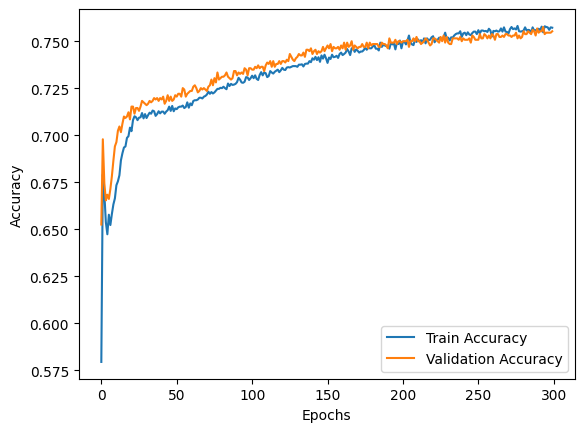

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       597
           1       0.76      0.81      0.78       727

    accuracy                           0.75      1324
   macro avg       0.75      0.75      0.75      1324
weighted avg       0.75      0.75      0.75      1324



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#gráfico
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Metrical de evaluación
y_pred = (model.predict(X_test) > 0.5).astype(int)# Umbral de 0.5
print(classification_report(y_test, y_pred))


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=False)

print( 'Test accuracy:', test_acc, " test_loss: ", test_loss)

Test accuracy: 0.754531741142273  test_loss:  0.4980096220970154


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


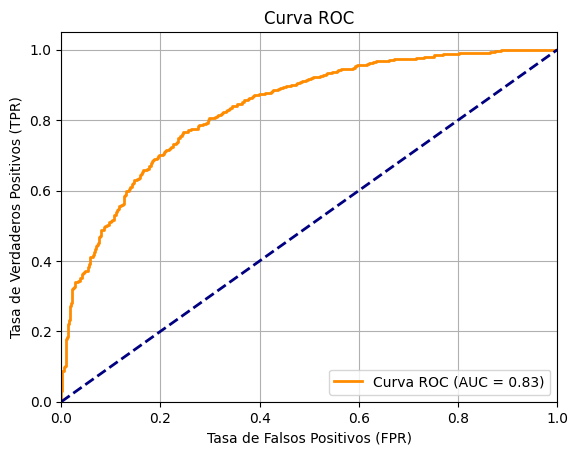

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_test)

# Calcular curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **DL- SEÑALES de compra**

In [ ]:
df = pd.read_csv(MSFT_H1R)
df['min_3h'] = df['low'].rolling(3).min()

#Etiquetta: 1 si el precio subió >=1% desde el cierre reciente
df['signal'] = (df['close'] > df['min_3h'] * 1.01).astype(int) #df['signal'] = (df['close'] > 0.98 * df['min_3h']).astype(int)

#Eliminar filas con NaN (primeras 5 filas sin max_5d)
df = df.dropna()

df.head(5)

,datetime,open,high,low,close,volume,min_3h,signal
2,1998-01-02 18:00:00,131.50,131.50,130.50,130.62,758400,129.63,0
3,1998-01-02 19:00:00,130.56,131.00,130.56,130.75,249800,129.94,0
4,1998-01-02 20:00:00,130.75,130.93,130.25,130.44,352702,130.25,0
5,1998-01-02 21:00:00,130.31,130.38,129.50,130.19,419704,129.50,0
6,1998-01-02 22:00:00,130.06,131.13,129.62,131.13,878903,129.50,1


In [ ]:
#Rango diario (high - low)
df['range'] = df['high'] - df['low']

#Cambio diario (close - open)
df['change'] = df['close'] - df['open']

#Media móvil de 5 y 20 días
df['MA_5'] = df['close'].rolling(5).mean()
df['MA_20'] = df['close'].rolling(20).mean()

#--------------------------------------------
window = 14
signal_period = 9
lookback = 10
variation_threshold = 0.02
lower_bound = 0.50
upper_bound = 0.78
wick_threshold = 1.0  # Lower wick must be >2x body for price_spike
volume_spike_threshold = 2.0
df['imbalance_indicator'] = np.zeros(len(df))
variation = (df['close'] - df['open']) / df['open']
for i in df.index[lookback:]:
        past_candles = variation.loc[df.index[df.index.get_loc(i) - lookback:df.index.get_loc(i)]]
        significant_candles = past_candles[past_candles > variation_threshold]
        if not significant_candles.empty:
            sig_idx = significant_candles.index[-1]
            sig_variation = variation.loc[sig_idx]
            sig_close = df['close'].loc[sig_idx]
            current_close = df['open'].loc[i]
            diff = sig_close - current_close
            variation_range = sig_variation * df['open'].loc[sig_idx]
            lower_limit = variation_range * lower_bound
            upper_limit = variation_range * upper_bound
            if lower_limit <= diff <= upper_limit:
                df['imbalance_indicator'].loc[i] = 1
#-------------------------------------------------





#RSI (Relative Strength Index)
delta = df['close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
df['RSI'] = 100 - (100 / (1 + avg_gain / avg_loss))

#--------------------------------------

# MACD
df['ema_fast'] = df['close'].ewm(span=12, adjust=False).mean()
df['ema_slow'] = df['close'].ewm(span=24, adjust=False).mean()
df['macd'] = df['ema_fast'] - df['ema_slow']  # Corrected: fast - slow
df['MACD_Signal'] = df['macd'].ewm(span=signal_period, adjust=False).mean()

    # Señal_Alcista
condicion_rsi = (df['RSI'].shift(1) <= 30) & (df['RSI'] > 30)
condicion_macd = (df['macd'].shift(1) <= df['MACD_Signal'].shift(1)) & (df['macd'] > df['MACD_Signal'])
condicion_imbalance = df['imbalance_indicator'] == 1
df['Señal_Alcista'] = np.where(condicion_rsi & condicion_macd & condicion_imbalance, 1, 0)

    # Volume Change
df['vol_change'] = df['volume'].pct_change()

    # New Indicators
    # 1. Price Spike (Large Downward Wick, Liquidity Grab)
df['body'] = abs(df['close'] - df['open'])
df['lower_wick'] = df['open'].where(df['close'] > df['open'], df['close']) - df['low']
df['price_spike'] = np.where((df['lower_wick'] > wick_threshold * df['body']) & (df['lower_wick'] > 0), 1, 0)


    # 3. Bollinger Breakout (Price Outside Bollinger Bands)





#---------------------------

#Eliminar filas con NaN (por indicadores)
df = df.dropna()

#features finales
features = ['open', 'high', 'low', 'close', 'volume', 'range', 'change', 'MA_5', 'MA_20', 'RSI','Señal_Alcista','price_spike','imbalance_indicator']
X = df[features].values
y = df['signal'].values

<ipython-input-24-1abe8786ebf8>:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['imbalance_indicator'].loc[i] = 1
<ipython-input-24-1abe8786ebf8>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Normalización (escalar a [0, 1])
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#entrenamiento 80% y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)


Gradient boosting oportunidad de compra

In [ ]:
from xgboost import XGBClassifier
est = XGBClassifier(max_depth=6, n_estimators=100, random_state=42)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6971
           1       0.80      0.60      0.69      2374

    accuracy                           0.86      9345
   macro avg       0.84      0.77      0.80      9345
weighted avg       0.86      0.86      0.85      9345



red neuraonal densa- oportunidad de compra

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
early_stop = EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=8,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/30
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.7449 - loss: 0.6283 - val_accuracy: 0.7425 - val_loss: 0.5761
Epoch 2/30
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7457 - loss: 0.5719 - val_accuracy: 0.7425 - val_loss: 0.5690
Epoch 3/30
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7461 - loss: 0.5635 - val_accuracy: 0.7425 - val_loss: 0.5627
Epoch 4/30
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7441 - loss: 0.5593 - val_accuracy: 0.7425 - val_loss: 0.5560
Epoch 5/30
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7466 - loss: 0.5498 - val_accuracy: 0.7425 - val_loss: 0.5491
Epoch 6/30
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7436 - loss: 0.5441 - val_accuracy: 0.7424 - val_loss: 0.5428
Epoch 7/30
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7484 - loss: 0.5350 - val_accuracy: 0.7431 - val_loss: 0.5364
Epoch 8/30
4673/4673 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7462 - loss: 0

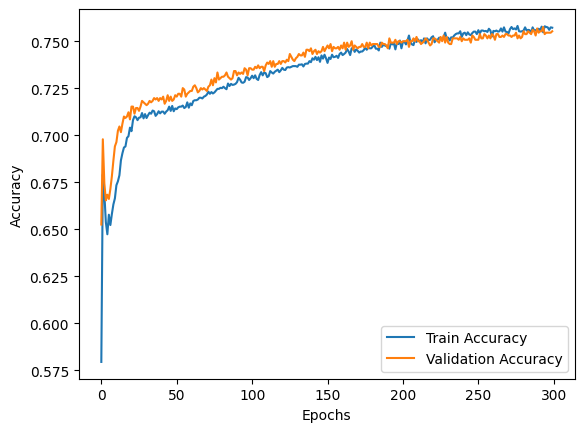

InvalidArgumentError: Graph execution error:

Detected at node sequential_3_1/dense_12_1/MatMul defined at (most recent call last):
<stack traces unavailable>
Matrix size-incompatible: In[0]: [32,13], In[1]: [10,128]

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-27-651382ca7c99>", line 2, in <cell line: 0>
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 249, in one_step_on_data
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 104, in predict_step
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py", line 144, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 3815, in matmul
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 501, in matmul

	 [[{{node sequential_3_1/dense_12_1/MatMul}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_1135321[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_1135340]

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#gráfico
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Metrical de evaluación
y_pred = (model.predict(X_test) > 0.5).astype(int)# Umbral de 0.5
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred = model.predict(X_test)

# Calcular curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

InvalidArgumentError: Graph execution error:

Detected at node sequential_3_1/dense_12_1/MatMul defined at (most recent call last):
<stack traces unavailable>
Matrix size-incompatible: In[0]: [32,13], In[1]: [10,128]

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-27-651382ca7c99>", line 2, in <cell line: 0>
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 249, in one_step_on_data
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 104, in predict_step
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py", line 144, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/numpy.py", line 3815, in matmul
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/numpy.py", line 501, in matmul

	 [[{{node sequential_3_1/dense_12_1/MatMul}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_1135321[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_1135340]

gradient **boosting** - compras

In [ ]:
from xgboost import XGBClassifier
est = XGBClassifier(max_depth=6, n_estimators=100, random_state=42)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6971
           1       0.80      0.60      0.69      2374

    accuracy                           0.86      9345
   macro avg       0.84      0.77      0.80      9345
weighted avg       0.86      0.86      0.85      9345



MODELO LSTM de compra

In [ ]:
def create_sequences(X, y, timesteps):
    X_seq, y_seq = [], []
    for i in range(len(X) - timesteps):
        X_seq.append(X[i:i + timesteps])
        y_seq.append(y[i + timesteps])
    return np.array(X_seq), np.array(y_seq)

In [ ]:
timesteps = 20
X_train_seq, y_train_seq = create_sequences(X_train, y_train, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, timesteps)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_curve, auc

initial_learning_rate = 1e-4  # Small initial learning rate
decay_steps = 5000  # Customizable decay steps
decay_rate = 0.95   # Suggested decay rate, customizable
lr_schedule = ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=decay_steps,
    decay_rate=decay_rate,
    staircase=True
)
model = Sequential([
    LSTM(128, input_shape=(timesteps, X_train_seq.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(32, return_sequences=True),
    Dropout(0.3),
    LSTM(16),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=lr_schedule),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=60, restore_best_weights=True)

# Train model
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=20,
    batch_size=8,
    validation_data=(X_test_seq, y_test_seq),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
4670/4670 ━━━━━━━━━━━━━━━━━━━━ 64s 13ms/step - accuracy: 0.7417 - loss: 0.5750 - val_accuracy: 0.7462 - val_loss: 0.5665
Epoch 2/20
4670/4670 ━━━━━━━━━━━━━━━━━━━━ 60s 13ms/step - accuracy: 0.7437 - loss: 0.5694 - val_accuracy: 0.7462 - val_loss: 0.5665
Epoch 3/20
4670/4670 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - accuracy: 0.7481 - loss: 0.5649 - val_accuracy: 0.7462 - val_loss: 0.5666
Epoch 4/20
4670/4670 ━━━━━━━━━━━━━━━━━━━━ 86s 14ms/step - accuracy: 0.7403 - loss: 0.5732 - val_accuracy: 0.7462 - val_loss: 0.5666
Epoch 5/20
4670/4670 ━━━━━━━━━━━━━━━━━━━━ 79s 13ms/step - accuracy: 0.7403 - loss: 0.5731 - val_accuracy: 0.7462 - val_loss: 0.5665
Epoch 6/20
4670/4670 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - accuracy: 0.7504 - loss: 0.5621 - val_accuracy: 0.7462 - val_loss: 0.5666
Epoch 7/20
4670/4670 ━━━━━━━━━━━━━━━━━━━━ 87s 14ms/step - accuracy: 0.7459 - loss: 0.5670 - val_accuracy: 0.7462 - val_loss: 0.5667
Epoch 8/20
4670/4670 ━━━━━━━━━━━━━━━━━━━━ 78s 13ms/step - accuracy: 0.7456 -

In [ ]:
y_pred = (model.predict(X_test_seq) > 0.5).astype(int)  # Threshold at 0.5
print("\nClassification Report:")
print(classification_report(y_test_seq, y_pred, target_names=['No Buy (0)', 'Buy (1)']))

292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Classification Report:
              precision    recall  f1-score   support

  No Buy (0)       0.75      1.00      0.85      6958
     Buy (1)       0.00      0.00      0.00      2367

    accuracy                           0.75      9325
   macro avg       0.37      0.50      0.43      9325
weighted avg       0.56      0.75      0.64      9325



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


plot

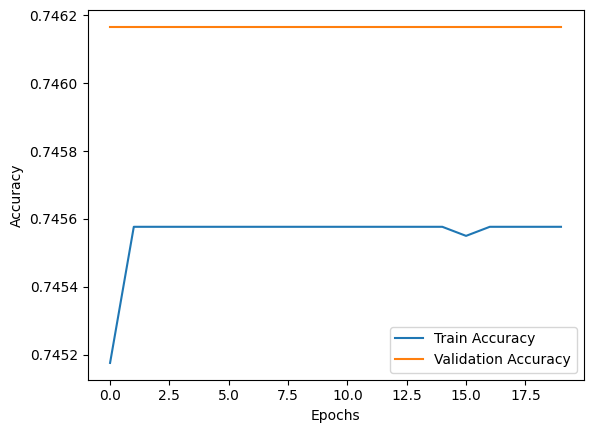

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 13), dtype=float32). Expected shape (None, 20, 13), but input has incompatible shape (32, 13)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 13), dtype=float32)
  • training=False
  • mask=None

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Classification report
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Threshold at 0.5
print(classification_report(y_test, y_pred))

auc

292/292 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


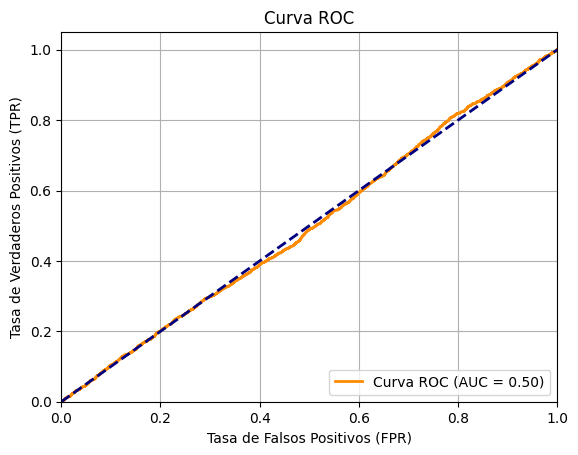

In [ ]:
y_pred = model.predict(X_test_seq)
fpr, tpr, _ = roc_curve(y_test_seq, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Modelo no supervisado - KMeans y PCA, para agrupar días similares:

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


#Rango diario (high - low)
AAPL_D1['range_pct'] = ((AAPL_D1['high'] - AAPL_D1['low']) / AAPL_D1['low']) * 100

#Cambio diario (close - open)
AAPL_D1['change_pct'] = ((AAPL_D1['close'] - AAPL_D1['open']) / AAPL_D1['open']) * 100

#RSI (Relative Strength Index)
delta = AAPL_D1['close'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
AAPL_D1['RSI'] = 100 - (100 / (1 + avg_gain / avg_loss))
AAPL_D1 = AAPL_D1.dropna()

features = ['volume', 'range_pct', 'change_pct', 'RSI']
data = AAPL_D1[features].copy()
data.head(5)

,volume,range_pct,change_pct,RSI
14,57682800,0.00,0.0,71.428571
15,34151796,6.25,0.0,71.428571
16,26947256,6.25,0.0,50.000000
17,36831200,6.25,0.0,60.000000
18,50573712,0.00,0.0,50.000000


Text(0.5, 1.0, 'Método del Codo para determinar\xa0k\xa0óptimo')

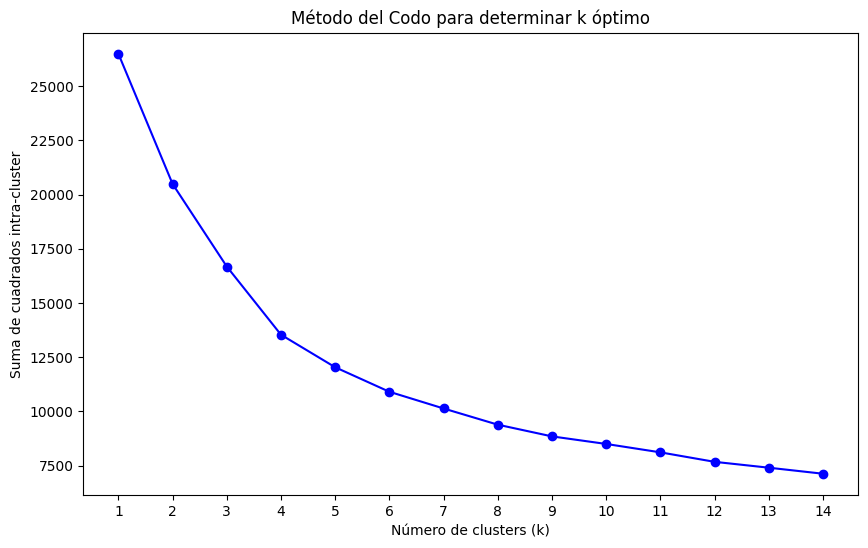

In [ ]:
#Normalización
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

#Prueba codo
inercia = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=21)
    kmeans.fit(scaled_data)
    inercia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inercia, 'bo-')
plt.xticks(np.arange(1, 15, 1))
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de cuadrados intra-cluster')
plt.title('Método del Codo para determinar k óptimo')

In [ ]:
AAPL_D1.head(5)

,datetime,open,high,low,close,volume,range_pct,change_pct,RSI
14,1998-01-23,0.17,0.17,0.17,0.17,57682800,0.00,0.0,71.428571
15,1998-01-26,0.17,0.17,0.16,0.17,34151796,6.25,0.0,71.428571
16,1998-01-27,0.16,0.17,0.16,0.16,26947256,6.25,0.0,50.000000
17,1998-01-28,0.16,0.17,0.16,0.16,36831200,6.25,0.0,60.000000
18,1998-01-29,0.16,0.16,0.16,0.16,50573712,0.00,0.0,50.000000


Text(0.5, 1.0, 'Visualización de Clusters\xa0con\xa0PCA')

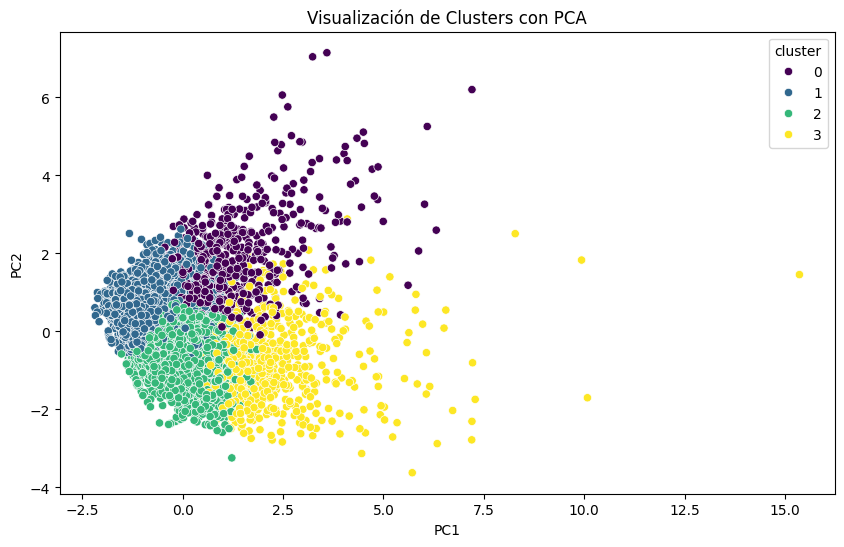

In [ ]:
#k=4
kmeans = KMeans(n_clusters=4, random_state=21)
clusters = kmeans.fit_predict(scaled_data)

AAPL_D1['cluster'] = clusters

#Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2']) #datframe para que se pueda gráficar
pca_df['cluster'] = clusters

# Visualizar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title('Visualización de Clusters con PCA')

In [ ]:
AAPL_D1.groupby('cluster')[['volume', 'range_pct', 'change_pct','RSI']].mean()

,volume,range_pct,change_pct,RSI
cluster,,,,
0,1.666238e+08,6.129560,3.851819,56.650112
1,7.567157e+07,1.921177,0.272387,70.423125
2,7.066219e+07,2.313074,-0.233140,41.054777
3,1.963408e+08,6.033213,-3.167154,45.301149


# **LSTM- Señales de compra**

In [ ]:

import pandas as pd, numpy as np, torch, torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, auc


def cargar_datos(ruta):
    df = pd.read_csv(ruta, parse_dates=['datetime'], index_col='datetime')
    if 'lol' in df.columns:
        df.drop(columns=['lol'], inplace=True)
    return df

def generar_objetivo(df, horizonte=250, umbral=0.00214):  # > objetivo: subida del 0.214% en las próximas 250 velas
    cierre = df['close'].values
    etiquetas = np.zeros(len(df), dtype=np.int8)
    limite = len(df) - horizonte
    for i in range(limite):
        if cierre[i+1:i+1+horizonte].max() >= cierre[i]*(1+umbral):
            etiquetas[i] = 1
    df = df.iloc[:limite]
    df['target'] = etiquetas[:limite]
    positivos = (df['target'] == 1).sum()
    negativos = (df['target'] == 0).sum()
    total = len(df)
    print(f"total: {total} | subidas: {positivos} ({positivos/total:.2%}) | sin subida: {negativos} ({negativos/total:.2%})")
    return df

def indicadores(df):
    df = df.copy()

    # log-return
    df['log_return'] = np.log(df['close'] / df['close'].shift(1))

    # medias móviles simples
    df['sma10'] = df['close'].rolling(10).mean()
    df['sma20'] = df['close'].rolling(20).mean()
    df['sma50'] = df['close'].rolling(50).mean()

    # medias móviles exponenciales
    df['ema12'] = df['close'].ewm(span=12).mean()
    df['ema26'] = df['close'].ewm(span=26).mean()
    df['ema50'] = df['close'].ewm(span=50).mean()

    # MACD
    df['macd'] = df['ema12'] - df['ema26']
    df['macd_signal'] = df['macd'].ewm(span=9).mean()
    df['macd_hist'] = df['macd'] - df['macd_signal']

    # DEMA y TEMA
    ema10 = df['close'].ewm(span=10).mean()
    df['dema'] = 2 * ema10 - ema10.ewm(span=10).mean()
    ema1 = df['close'].ewm(span=10).mean()
    ema2 = ema1.ewm(span=10).mean()
    ema3 = ema2.ewm(span=10).mean()
    df['tema'] = 3 * ema1 - 3 * ema2 + ema3

    # WMA
    pesos = np.arange(1, 11)
    df['wma10'] = df['close'].rolling(10).apply(lambda x: np.dot(x, pesos)/pesos.sum(), raw=True)

    # RSI
    delta = df['close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    df['rsi'] = 100 - (100 / (1 + rs))

    # Bollinger Bands y su ancho
    sma20 = df['close'].rolling(20).mean()
    std20 = df['close'].rolling(20).std()
    df['bb_upper'] = sma20 + 2 * std20
    df['bb_lower'] = sma20 - 2 * std20
    df['bb_width'] = df['bb_upper'] - df['bb_lower']

    # CCI
    tp = (df['high'] + df['low'] + df['close']) / 3
    sma_tp = tp.rolling(20).mean()
    mad = (tp - sma_tp).abs().rolling(20).mean()
    df['cci'] = (tp - sma_tp) / (0.015 * mad)

    # Williams %R
    high14 = df['high'].rolling(14).max()
    low14 = df['low'].rolling(14).min()
    df['williams_r'] = -100 * ((high14 - df['close']) / (high14 - low14))

    # Estocástico %K y %D
    df['stoch_k'] = 100 * ((df['close'] - low14) / (high14 - low14))
    df['stoch_d'] = df['stoch_k'].rolling(3).mean()

    # ROC
    df['roc'] = df['close'].pct_change(periods=10)

    # Momentum
    df['momentum'] = df['close'] - df['close'].shift(10)

    # ATR
    high_low = df['high'] - df['low']
    high_close = np.abs(df['high'] - df['close'].shift())
    low_close = np.abs(df['low'] - df['close'].shift())
    tr = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    df['atr'] = tr.rolling(14).mean()

    # TRIX
    ema1 = df['close'].ewm(span=15).mean()
    ema2 = ema1.ewm(span=15).mean()
    ema3 = ema2.ewm(span=15).mean()
    df['trix'] = ema3.pct_change()

    # Z-score del precio
    df['zscore'] = (df['close'] - sma20) / std20

    # Mediana móvil
    df['median10'] = df['close'].rolling(10).median()

    # Cuerpo y sombras de la vela
    df['cuerpo'] = (df['close'] - df['open']).abs()
    df['sombra_sup'] = df['high'] - df[['close', 'open']].max(axis=1)
    df['sombra_inf'] = df[['close', 'open']].min(axis=1) - df['low']

    df.dropna(inplace=True)
    return df

def escalar_features(df, columnas):
    scaler = MinMaxScaler()
    X = scaler.fit_transform(df[columnas])
    return X, scaler

def crear_ventanas(X, y, largo=800):  # > largo = cuantas le meto para q entrene
    v = np.lib.stride_tricks.sliding_window_view(X, (largo, X.shape[1]))[:, 0]
    return v, y[largo:]

class DatasetSecuencia(torch.utils.data.Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
    def __len__(self): return len(self.y)
    def __getitem__(self, i): return self.X[i], self.y[i]

class ModeloLSTM(nn.Module):
    def __init__(self, entradas, h1=512, h2=256, h3=128):
        super().__init__()
        self.lstm1 = nn.LSTM(entradas, h1, batch_first=True)
        self.lstm2 = nn.LSTM(h1, h2, batch_first=True)
        self.lstm3 = nn.LSTM(h2, h3, batch_first=True)
        self.fc1 = nn.Linear(h3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        x = torch.relu(self.fc1(x[:, -1]))
        x = torch.relu(self.fc2(x))
        return self.fc3(x).view(-1)  # logits



def entrenar(modelo, dl_train, dl_val, device='cuda', epochs=18, lr=1e-3, penalizacion_fp=2.1, paciencia=5):
    from tqdm.auto import tqdm
    from rich import print as rprint
    from rich.console import Console
    from rich.panel import Panel
    from rich.text import Text
    import torch
    import torch.nn as nn
    opt = torch.optim.Adam(modelo.parameters(), lr=lr)
    loss_fn = nn.BCEWithLogitsLoss(reduction='none')
    scaler = torch.cuda.amp.GradScaler(enabled=device.startswith('cuda'))
    mejor_estado, mejor_loss, espera = None, float('inf'), 0
    console = Console()

    for ep in range(1, epochs + 1):
        rprint(Panel.fit(f"🌀 [bold green]Época {ep}/{epochs}[/bold green]", title="Entrenamiento"))
        modelo.train()
        bar_train = tqdm(dl_train, desc=f"[green]Entrenando (Época {ep})", leave=False)

        for i, (xb, yb) in enumerate(bar_train, 1):
            xb, yb = xb.to(device), yb.to(device)
            opt.zero_grad(set_to_none=True)

            with torch.cuda.amp.autocast(enabled=device.startswith('cuda')):
                logit = modelo(xb)
                pesos = torch.where(yb == 0, penalizacion_fp, 1.0)
                loss = (loss_fn(logit, yb) * pesos).mean()

            scaler.scale(loss).backward()
            scaler.step(opt)
            scaler.update()

            bar_train.set_postfix(loss=f"{loss.item():.5f}")

        modelo.eval()
        val_losses = []
        bar_val = tqdm(dl_val, desc=f"[cyan]Validando (Época {ep})", leave=False)
        with torch.no_grad():
            for j, (x, y) in enumerate(bar_val, 1):
                x, y = x.to(device), y.to(device)
                val_loss_batch = loss_fn(modelo(x), y)
                val_losses.append(val_loss_batch)
            val_loss = torch.cat(val_losses).mean().item()

        rprint(f" [yellow]Pérdida de validación en época {ep:02d}[/yellow]: [bold white]{val_loss:.6f}[/bold white]")

        if val_loss < mejor_loss - 1e-4:
            rprint(f"[bold green] Mejoría detectada ({mejor_loss:.6f} ⟶ {val_loss:.6f}). Guardando modelo...[/bold green]")
            mejor_loss, mejor_estado, espera = val_loss, modelo.state_dict(), 0
        else:
            espera += 1
            rprint(f"[bold red] BNOO SIRVE. Espera: {espera}/{paciencia}[/bold red]")
            if espera >= paciencia:
                rprint(Panel.fit("[bold red]SE PARA  TEMPRANO[/bold red]", title="Early Stopping", border_style="red"))
                break

    modelo.load_state_dict(mejor_estado)
    rprint(Panel.fit("[bold green] ACABO[/bold green]", title="Final", border_style="green"))


def mejor_umbral(y_real, y_prob, min_prec=0.9):
    p, r, t = precision_recall_curve(y_real, y_prob)
    p, r = p[:-1], r[:-1]
    filtro = p >= min_prec
    return t[filtro][np.argmax(r[filtro])] if filtro.any() else 0.5

def evaluar(modelo, dl, thr, device='cpu'):
    modelo.eval()
    with torch.no_grad():
        logits = torch.cat([modelo(x.to(device)) for x,_ in dl]).cpu()
        prob = torch.sigmoid(logits).numpy()
        ytrue = torch.cat([y for _,y in dl]).numpy()
    ypred = (prob >= thr).astype(int)
    cm = confusion_matrix(ytrue, ypred, labels=[0,1])
    prec = precision_score(ytrue, ypred, zero_division=0)
    rec = recall_score(ytrue, ypred, zero_division=0)
    f1 = f1_score(ytrue, ypred, zero_division=0)
    acc = accuracy_score(ytrue, ypred)
    fpr, tpr, _ = roc_curve(ytrue, prob)
    auc_score = auc(fpr, tpr)
    p_curve, r_curve, thresholds = precision_recall_curve(ytrue, prob)
    print(f"\nTH = {thr:.3f} | precisión = {prec:.3f} | recall = {rec:.3f} | f1 = {f1:.3f} | acc = {acc:.3f} | auc = {auc_score:.3f}")
    print("matriz de confusión:\n", cm)
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    axs[0].plot(fpr, tpr, label=f'AUC = {auc_score:.3f}', color='blue')
    axs[0].plot([0,1],[0,1],'--', color='gray')
    axs[0].set_title('ROC')
    axs[0].legend()
    axs[0].grid(True)
    axs[1].plot(thresholds, p_curve[:-1], label='precisión', color='green')
    axs[1].plot(thresholds, r_curve[:-1], label='recall', color='orange')
    axs[1].axvline(x=thr, color='red', linestyle='--', label=f'th = {thr:.3f}')
    axs[1].set_title('precisión y recall')
    axs[1].legend()
    axs[1].grid(True)
    axs[2].hist(prob, bins=50, color='skyblue', edgecolor='black')
    axs[2].axvline(x=thr, color='red', linestyle='--', label=f'th = {thr:.3f}')
    axs[2].set_title('distribución de probabilidades')
    axs[2].legend()
    axs[2].grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    torch.backends.cudnn.benchmark = True
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    df = cargar_datos('DAX_M1.csv')
    df = indicadores(generar_objetivo(df))
    columnas = ['open','high','low','close','log_return','ema12','ema26','macd','rsi','bb_upper','bb_lower','macd_signal','macd_hist','momentum','trix','williams_r','stoch_k','stoch_d','atr','cci','bb_width']
    X, scaler = escalar_features(df, columnas)
    X, y = crear_ventanas(X, df['target'].values, 380)
    split = int(0.8 * len(X))
    ds_tr, ds_v = DatasetSecuencia(X[:split], y[:split]), DatasetSecuencia(X[split:], y[split:])
    dl_tr = torch.utils.data.DataLoader(ds_tr, 128, shuffle=True, pin_memory=True)
    dl_v  = torch.utils.data.DataLoader(ds_v , 128, shuffle=False, pin_memory=True)
    modelo = ModeloLSTM(X.shape[2]).to(device)
    entrenar(modelo, dl_tr, dl_v, device)
    with torch.no_grad():
        logits = torch.cat([modelo(x.to(device)) for x,_ in dl_v])
        probs = torch.sigmoid(logits).cpu().numpy()
        etiquetas = np.concatenate([y.numpy() for _,y in dl_v])
    umbral = mejor_umbral(etiquetas, probs, 0.9)
    evaluar(modelo, dl_v, umbral, device)


# **Modelo no supervisado**

Anomalías detectadas: 2106 de 6639


<ipython-input-28-536f6700f03d>:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  grid_orig = torch.tensor(pca.inverse_transform(grid), device=device)


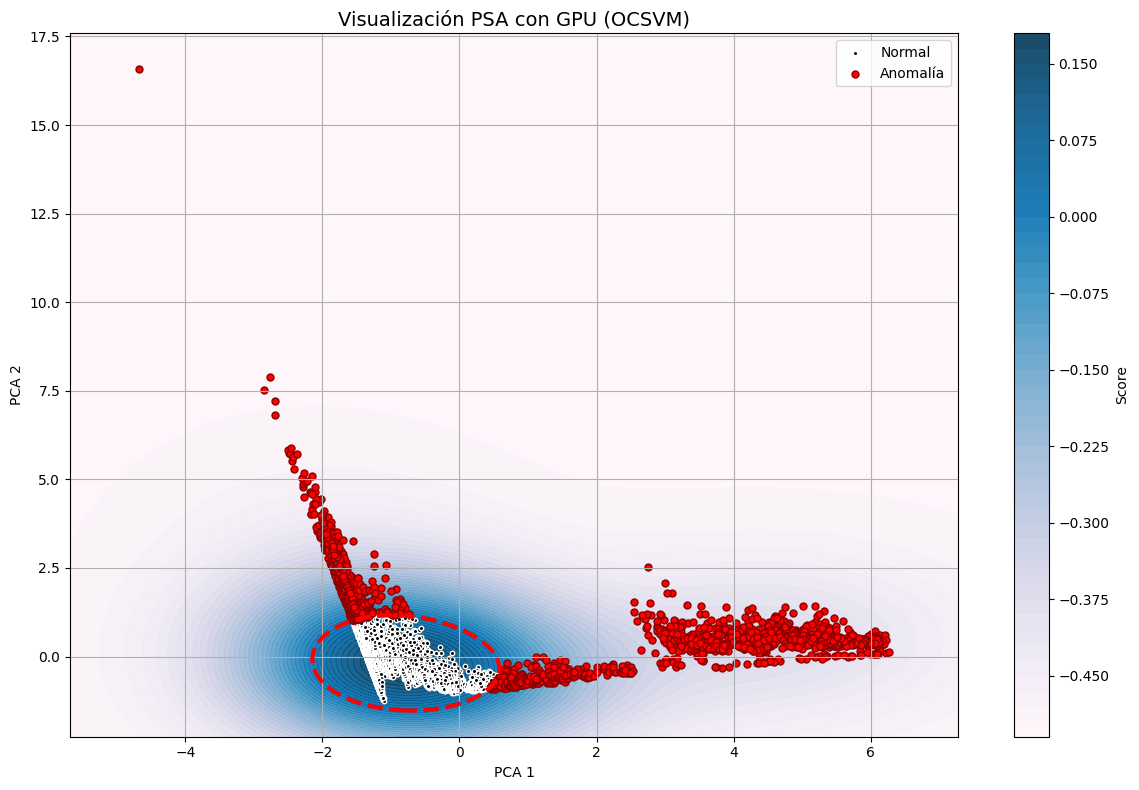

In [ ]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def cargar_datos(csv_path):
    df = pd.read_csv(AAPL_D1R)
    df = df.drop(columns=['datetime'])

    X = df[['open', 'high', 'low', 'close', 'volume']].values
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    return torch.tensor(X, dtype=torch.float32).to(device)
def cargar_datos_recargad(csv_path, window=14):
    import pandas as pd
    import torch

    df = pd.read_csv(csv_path)
    df = df.drop(columns=['datetime'])

    close = df['close']
    high = df['high']
    low = df['low']
    volume = df['volume']

    df['sma'] = close.rolling(window).mean()
    df['ema'] = close.ewm(span=window, adjust=False).mean()

    delta = close.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window).mean()
    avg_loss = loss.rolling(window).mean()
    rs = avg_gain / (avg_loss + 1e-10)
    df['rsi'] = 100 - (100 / (1 + rs))

    ema_fast = close.ewm(span=12, adjust=False).mean()
    ema_slow = close.ewm(span=26, adjust=False).mean()
    df['macd'] = ema_fast - ema_slow

    sma20 = close.rolling(20).mean()
    std20 = close.rolling(20).std()
    bb_up = sma20 + 2 * std20
    bb_down = sma20 - 2 * std20
    df['bb_width'] = bb_up - bb_down

    df['volume_z'] = (volume - volume.rolling(window).mean()) / (volume.rolling(window).std() + 1e-10)

    df = df.dropna()

    features = df[['open', 'high', 'low', 'close', 'volume',
                   'sma', 'ema', 'rsi', 'macd', 'bb_width', 'volume_z']].values
    features = (features - features.mean(axis=0)) / features.std(axis=0)
    return torch.tensor(features, dtype=torch.float32).to(device)
def submuestreo(X, n_sub=2000, seed=42):
    torch.manual_seed(seed)
    idx = torch.randperm(X.shape[0])[:n_sub]
    return X[idx], idx

def rbf_kernel(X, Y=None, gamma=0.3):
    if Y is None:
        Y = X
    X_norm = (X ** 2).sum(dim=1).view(-1, 1)
    Y_norm = (Y ** 2).sum(dim=1).view(1, -1)
    K = X_norm + Y_norm - 2.0 * torch.mm(X, Y.t())
    return torch.exp(-gamma * K)

class OCSVM_GPU(torch.nn.Module):
    def __init__(self, nu=0.05, gamma=0.3, lr=0.001, max_iter=1000):
        super().__init__()
        self.nu = nu
        self.gamma = gamma
        self.lr = lr
        self.max_iter = max_iter

    def fit(self, X):
        n = X.shape[0]
        self.X_train = X
        self.alpha = torch.rand(n, device=device)
        self.alpha /= self.alpha.sum()
        C = 1.0 / (self.nu * n)
        K = rbf_kernel(X, gamma=self.gamma)
        for _ in range(self.max_iter):
            grad = -torch.matmul(K, self.alpha)
            self.alpha = self.alpha - self.lr * grad
            self.alpha = torch.clamp(self.alpha, 0, C)
            self.alpha /= self.alpha.sum()
        support_mask = (self.alpha > 1e-5) & (self.alpha < C)
        if support_mask.sum() == 0:
            support_mask = (self.alpha > 1e-5)
        self.rho = torch.mean(torch.matmul(K[support_mask], self.alpha))

    def decision_function(self, X_test):
        K_test = rbf_kernel(X_test, self.X_train, gamma=self.gamma)
        scores = torch.matmul(K_test, self.alpha) - self.rho
        return scores

    def predict(self, X_test):
        scores = self.decision_function(X_test)
        return torch.where(scores >= 0, 1, -1)

def visualizar_ocsvm(modelo, X, y_pred):
    X_cpu = X.detach().cpu().numpy()
    y_pred_cpu = y_pred.detach().cpu().numpy()
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X_cpu)
    xx, yy = torch.meshgrid(
        torch.linspace(X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1, 400),
        torch.linspace(X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1, 400),
        indexing="xy"
    )
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    grid_orig = torch.tensor(pca.inverse_transform(grid), device=device)
    Z = modelo.decision_function(grid_orig).view(xx.shape).detach().cpu().numpy()
    plt.figure(figsize=(12, 8))
    contour = plt.contourf(xx.numpy(), yy.numpy(), Z, levels=50, cmap='PuBu', alpha=0.9)
    plt.contour(xx.numpy(), yy.numpy(), Z, levels=[0], linewidths=3, colors='red', linestyles='--')
    plt.scatter(X_2d[y_pred_cpu == 1, 0], X_2d[y_pred_cpu == 1, 1], c='black', s=10, edgecolors='white', label='Normal')
    plt.scatter(X_2d[y_pred_cpu == -1, 0], X_2d[y_pred_cpu == -1, 1], c='red', s=25, edgecolors='darkred', label='Anomalía')
    plt.title("Visualización PSA con GPU (OCSVM)", fontsize=14)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(contour, label='Score')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

csv_path = "ACCCIONES.csv"
sample_size = 1000
nu_val = 0.98
gamma_val = 0.21
lr_val = 0.001
max_iter_val = 1000

X_total = cargar_datos(csv_path)

X_train, idx_train = submuestreo(X_total, n_sub=sample_size)
modelo = OCSVM_GPU(nu=nu_val, gamma=gamma_val, lr=lr_val, max_iter=max_iter_val)
modelo.fit(X_train)
y_pred = modelo.predict(X_total)
print(f"Anomalías detectadas: {(y_pred == -1).sum().item()} de {len(X_total)}")
visualizar_ocsvm(modelo, X_total, y_pred)


Anomalías detectadas: 17396 de 46739

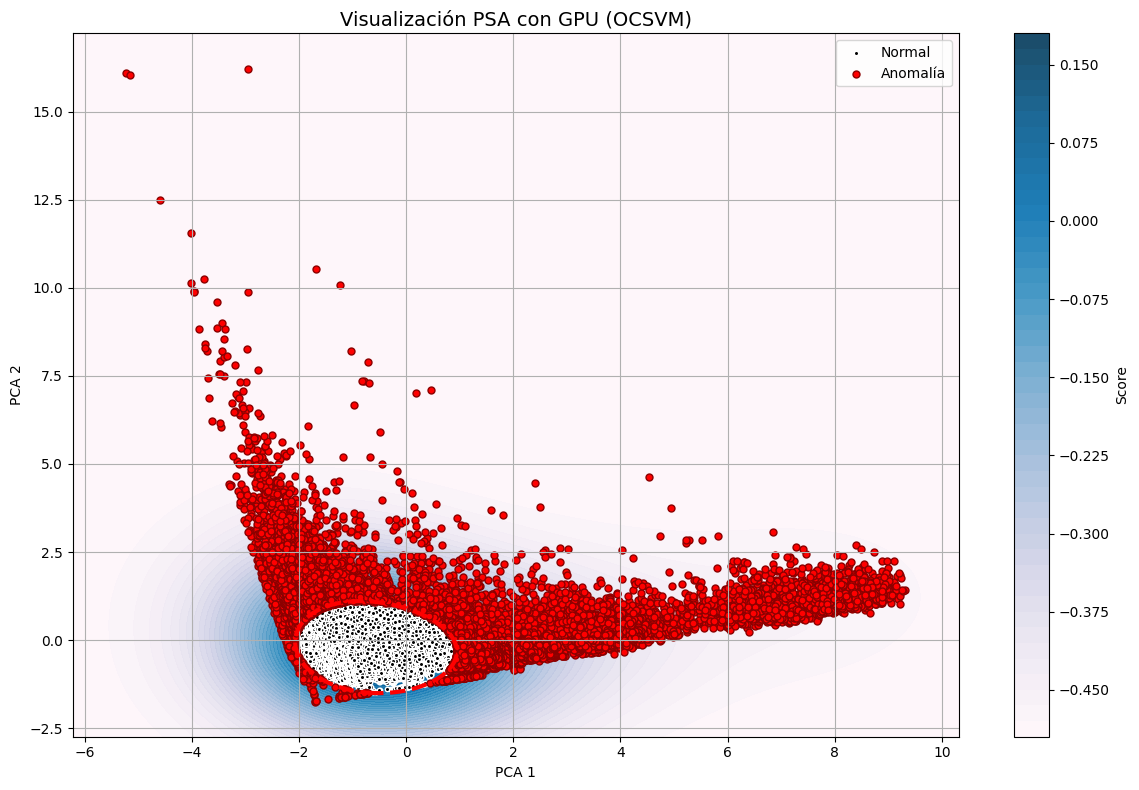